In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [5]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
titanic["class"].unique()
titanic["class"].value_counts()

class
Third     491
First     214
Second    184
Name: count, dtype: int64

In [19]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [8]:
titanic.drop(columns="deck", inplace=True)

In [9]:
# att göra de tomma till Southampton
#titanic["embark_town"].fillna(titanic["embark_town"].mode()[0], inplace=True)

# Att ta bort de två som inte hade en embark_town
titanic.dropna(subset=["embark_town"], inplace=True)

titanic["embark_town"].value_counts()


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [12]:
median_age_male = titanic.query("sex=='male'")["age"].median()
median_age_female = titanic.query("sex=='female'")["age"].median()

print(f"{median_age_female = }")
print(f"{median_age_male = }")

median_age_female = 27.0
median_age_male = 29.0


In [17]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_age_male)
titanic["age"] = titanic["age"].fillna(median_age_female)

<Axes: xlabel='age', ylabel='Count'>

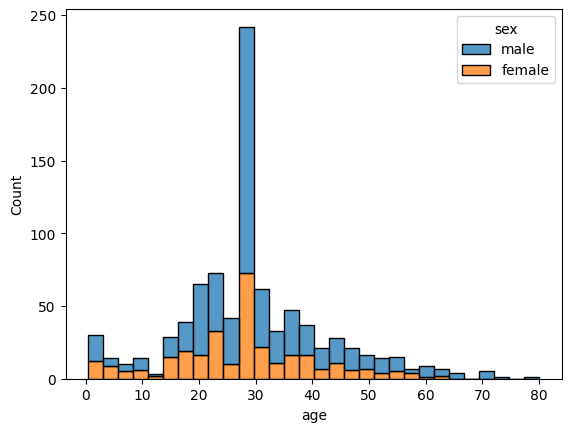

In [21]:
sns.histplot(x="age", hue="sex", multiple="stack", data=titanic)